<a href="https://colab.research.google.com/github/muthu165/MACHINE-LEARNING-/blob/main/tax_evasion_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [66]:
file_data = pd.read_csv("Fraud_check.csv")

In [67]:
df1 = file_data.copy()
df1.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [68]:
df1.shape

(600, 6)

In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [70]:
df1.describe(include="all")

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


In [71]:
df1['Messure'] = df1['Taxable.Income'].apply(lambda x : 'Risky' if x <= 30000 else  'Good')
df1.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Messure
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good


In [72]:
conditions = [(df1['Work.Experience']>= 20), (df1['Work.Experience']>= 10), (df1['Work.Experience']< 10)]
choices= ['highly_exprinced', 'mid_exprinced', 'less_exprinced']
df1['category_exprince'] = np.select(conditions,choices, default= 'non_exprinced' )
df1.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Messure,category_exprince
0,NO,Single,68833,50047,10,YES,Good,mid_exprinced
1,YES,Divorced,33700,134075,18,YES,Good,mid_exprinced


In [73]:
conditions = [(df1['City.Population']>= 150000), (df1['City.Population']>= 80000), (df1['Work.Experience']< 25000)]
choices= ['highly_population', 'mid_population', 'less_population']
df1['Population_level'] =np.select(conditions,choices, default= 'non_population' )
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Messure,category_exprince,Population_level
0,NO,Single,68833,50047,10,YES,Good,mid_exprinced,less_population
1,YES,Divorced,33700,134075,18,YES,Good,mid_exprinced,mid_population
2,NO,Married,36925,160205,30,YES,Good,highly_exprinced,highly_population
3,YES,Single,50190,193264,15,YES,Good,mid_exprinced,highly_population
4,NO,Married,81002,27533,28,NO,Good,highly_exprinced,less_population


In [74]:
conditions = [(df1['Taxable.Income']>= 100000), (df1['Taxable.Income']>= 60000), (df1['Taxable.Income']>= 25000)]
choices= ['highly_income', 'mid_income', 'less_mid_income']
df1['income_level'] =np.select(conditions,choices, default= 'low_income' )
df1.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Messure,category_exprince,Population_level,income_level
0,NO,Single,68833,50047,10,YES,Good,mid_exprinced,less_population,mid_income
1,YES,Divorced,33700,134075,18,YES,Good,mid_exprinced,mid_population,less_mid_income


In [75]:
# EDA
# Total number of risk holders
print()
risk = len(df1[df1['Taxable.Income']<= 30000])
print('Total number of risk status ', risk)


Total number of risk status  124


In [76]:
#Total number of good
good = len(df1[df1['Taxable.Income']> 30000])
print('Total number of good status ', good)

Total number of good status  476


<Axes: xlabel='category_exprince'>

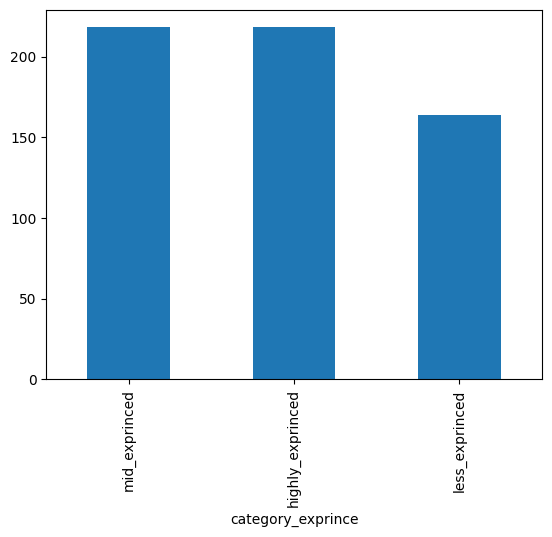

In [77]:
df1['category_exprince'].value_counts().plot(kind='bar')

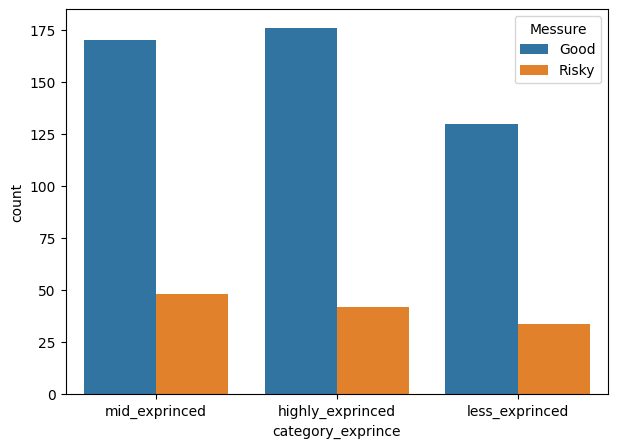

In [78]:
plt.figure(figsize = (7,5))
sns.countplot(x='category_exprince', hue='Messure', data=df1)
plt.show()

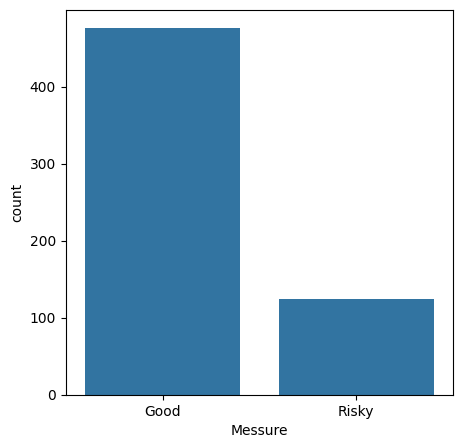

In [79]:
plt.figure(figsize = (5,5))
sns.countplot(x='Messure', data=df1)
plt.show()

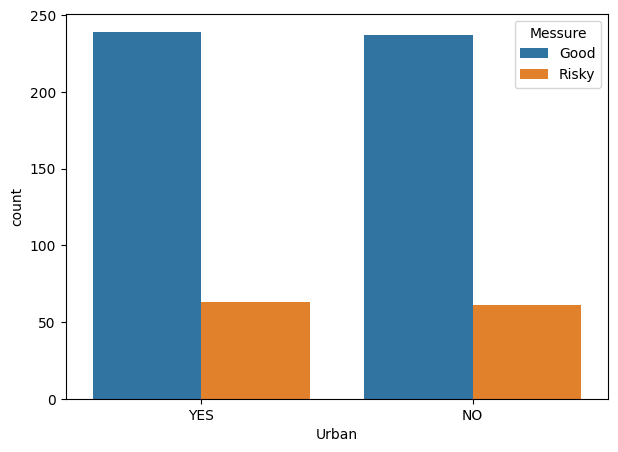

In [80]:
plt.figure(figsize = (7,5))
sns.countplot(x='Urban', hue='Messure',data=df1)
plt.show()

In [81]:
risky_income_group = df1[(df1['Messure']=='Risky')]['income_level'].value_counts()
print('Risk oriented income group', risky_income_group)

Risk oriented income group income_level
low_income         90
less_mid_income    34
Name: count, dtype: int64


<Axes: xlabel='income_level'>

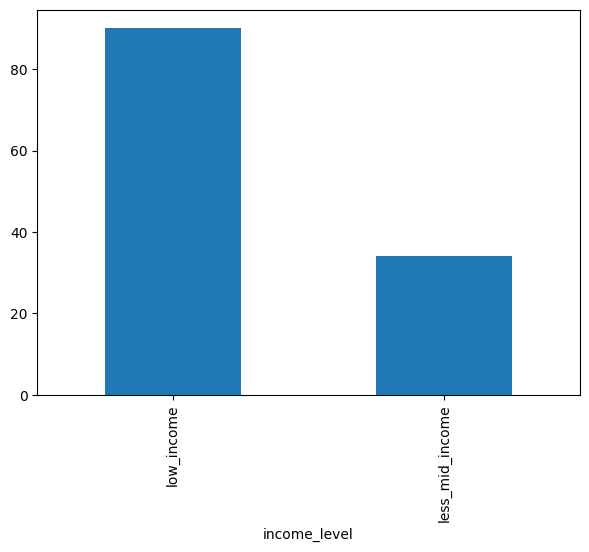

In [82]:
plt.figure(figsize = (7,5))
df1[(df1['Messure']=='Risky')]['income_level'].value_counts().plot(kind='bar')

In [83]:
df3 = df1.copy()
df3.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Messure,category_exprince,Population_level,income_level
0,NO,Single,68833,50047,10,YES,Good,mid_exprinced,less_population,mid_income
1,YES,Divorced,33700,134075,18,YES,Good,mid_exprinced,mid_population,less_mid_income


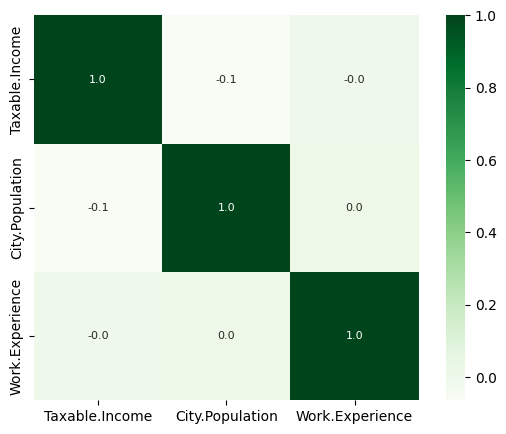

In [84]:
# Identify and handle non-numeric columns
non_numeric_cols = [col for col in df1.columns if df1[col].dtype == "object"]

# Option 1: Drop non-numeric columns
df1 = df1.drop(non_numeric_cols, axis=1)

# Calculate correlation matrix
correlation = df1.corr()

# Generate heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation,annot=True,cbar=True,square=True,annot_kws={"size": 8},fmt=".1f",cmap="Greens",)
plt.show()

In [85]:
df1 = file_data.copy()
df1.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES


In [86]:
df2= df1[['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population','Work.Experience','Urban']]

In [87]:
df2['Undergrad'] = df2['Undergrad'].apply(lambda x : 1 if x=='YES' else 0)
df2['Urban'] = df2['Urban'].apply(lambda x : 1 if x=='YES' else 0)
df2.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,68833,50047,10,1
1,1,Divorced,33700,134075,18,1


In [88]:
X = df2[['Undergrad','Taxable.Income', 'City.Population','Work.Experience', 'Urban' ]]
X.head(2)

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban
0,0,68833,50047,10,1
1,1,33700,134075,18,1


In [89]:
get_dummy = pd.get_dummies(df1['Marital.Status'])

In [90]:
X=pd.concat([X,get_dummy], axis=1)
X

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Divorced,Married,Single
0,0,68833,50047,10,1,False,False,True
1,1,33700,134075,18,1,True,False,False
2,0,36925,160205,30,1,False,True,False
3,1,50190,193264,15,1,False,False,True
4,0,81002,27533,28,0,False,True,False
...,...,...,...,...,...,...,...,...
595,1,76340,39492,7,1,True,False,False
596,1,69967,55369,2,1,True,False,False
597,0,47334,154058,0,1,True,False,False
598,1,98592,180083,17,0,False,True,False


In [91]:
y=df3['Messure']
y

,Messure
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=124)

In [93]:
model_rf = RandomForestClassifier(criterion='entropy',max_depth =9)
train_model = model_rf.fit(X_train,y_train)

In [94]:
prediction =train_model.predict(X_test)
prediction

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky'

In [95]:
accu_sc = accuracy_score(prediction,y_test)
print('Accuracy of model =',accu_sc)

Accuracy of model = 1.0
